In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker, cm, colors

# Problem 3: Rosenbrock's banana

Let us consider the **Rosenbrock's banana function**  

$$
f(x,y) = (x-1)^2 + 10(y-x^2)^2
$$

In [4]:
def ros(x,y):
    return (x-1)**2 + 10*(y-x**2)**2

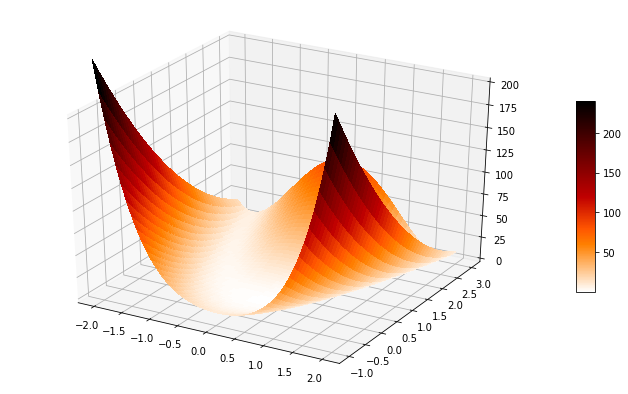

In [5]:
'plot the Rosenbrock function'

# Initialize figure 
figRos = plt.figure(figsize=(12, 7))
axRos = figRos.gca(projection='3d')

# Evaluate function
x = np.linspace(-2, 2, 1000) 
y = np.linspace(-1, 3, 1000)
X, Y = np.meshgrid(x, y)
Z = ros(X,Y)

# Plot the surface
surf = axRos.plot_surface(X, Y, Z, cmap=cm.gist_heat_r,
                       linewidth=0, antialiased=False)
axRos.set_zlim(0, 200)
figRos.colorbar(surf, shrink=0.5, aspect=10)
plt.show()


The minimum value of  the Rosenbrock function is zero.
That minimum is reached at the point  (1,1).
This minimum is inside a long, narrow, banana shaped flat valley. 

Text(0.5, 1.0, 'Contour plot of the Rosenbrock function')

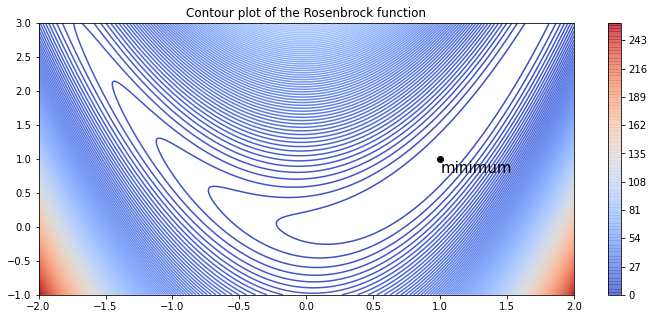

In [6]:
plt.figure(figsize=(12,5))
plt.contour(X,Y,Z,200, cmap=cm.coolwarm)
plt.plot(1,1,'ko')
plt.annotate('minimum', xy = (1,1),xytext=(1,1-0.2), fontsize=15)
plt.colorbar()
plt.title('Contour plot of the Rosenbrock function')

The **gradient** of the Rosenbrock function is given by

$$
\nabla f(x,y) = 
\begin{bmatrix}
\frac{\partial f}{\partial x} \\ \frac{\partial f}{\partial y}
\end{bmatrix} =
\begin{bmatrix}
2(x-1)-40(y-x^2)x\\
10(y-x^2)
\end{bmatrix}
$$

In [7]:
def grad_ros(x,y):
    dx = 2*(x-1)-40*(y-x**2)*x
    dy = 10*(y-x**2)
    return np.array([dx,dy])

Starting at the point $(x,y)=(-1.25,2.75)$ and using a learning rate $s=0.01$, how many iterations (epochs) do you need to find the minimum?

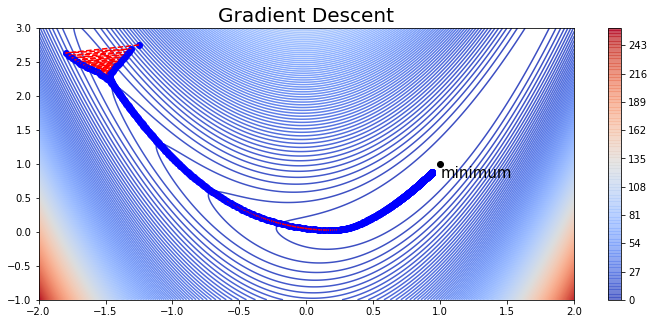

In [8]:
'Gradient Descent'
plt.figure(figsize=(12,5))
plt.contour(X,Y,Z,cmap=cm.coolwarm, levels=250)
plt.plot(1,1,'ko')
plt.annotate('minimum', xy = (1,1),xytext=(1,1-0.2), fontsize=15)
plt.colorbar()
plt.title('Gradient Descent',fontsize = 20)

s = 0.01 #learning rate

x = np.array([-1.25,2.75]) # initial point 
plt.plot(x[0],x[1],'bo')


epochs = 1000
for epoch in range(epochs): 
    new_x = x-s*grad_ros(x[0],x[1])
    plt.plot(new_x[0],new_x[1],'bo')
    plt.plot([x[0],new_x[0]],[x[1],new_x[1]],'r--')
    x = new_x

Add momentum to the Gradient Descent method. 
How many epochs do you need to reach the minimum?

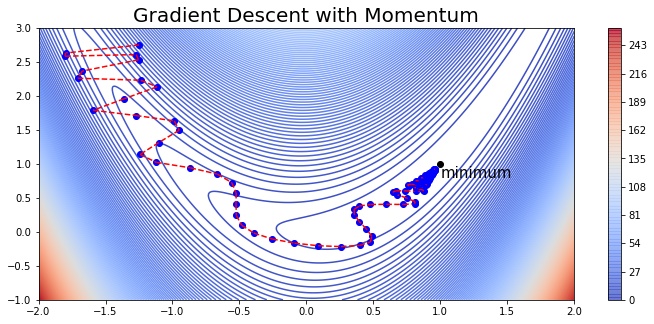

In [13]:
'Gradient Descent with Momentum'
plt.figure(figsize=(12,5))
plt.contour(X,Y,Z,cmap=cm.coolwarm, levels=250)
plt.plot(1,1,'ko')
plt.annotate('minimum', xy = (1,1),xytext=(1,1-0.2), fontsize=15)
plt.colorbar()
plt.title('Gradient Descent with Momentum',fontsize = 20)

# learning rate
s = 0.01 

# momentum coefficient
beta  = 0.9

x = np.array([-1.25,2.75]) # initial point 
plt.plot(x[0],x[1],'bo')

epochs = 100
d_current = np.zeros(2)
d_previous = np.zeros(2)
for epoch in range(epochs): 
    
    d_current = -s*grad_ros(x[0],x[1]) + beta*d_previous
    
    new_x = x+d_current
    plt.plot(new_x[0],new_x[1],'bo')
    plt.plot([x[0],new_x[0]],[x[1],new_x[1]],'r--')
    x = new_x
    d_previous = d_current